## **Note!**

Make sure you install pygame in your terminal: \
pip install pygame

## **Prototype 1 - Basic A***

This code will simulate a basic A* path searching. An AI agent will try to find a way out through the random generate maze. Press "R" to regenerate new maze while playing the game.

**To test it, run the code**

In [ ]:
import pygame
import sys
import random
import heapq

# Constants
WIDTH, HEIGHT = 800, 600
CELL_SIZE = 20
ROWS = HEIGHT // CELL_SIZE
COLS = WIDTH // CELL_SIZE

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

def generate_maze(rows, cols):
    """Generate a new random maze with different structure each run"""
    maze = [[1 for _ in range(cols)] for _ in range(rows)]
    start = (random.randint(0, rows-1), random.randint(0, cols-1))
    end = start
    while end == start:
        end = (random.randint(0, rows-1), random.randint(0, cols-1))

    # Improved maze generation with more randomness
    stack = [start]
    maze[start[0]][start[1]] = 0
    directions = [(-1,0),(1,0),(0,-1),(0,1)]

    while stack:
        current = stack[-1]
        neighbors = []
        for dx, dy in directions:
            nx, ny = current[0]+dx*2, current[1]+dy*2
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 1:
                neighbors.append((nx, ny))

        if neighbors:
            next_cell = random.choice(neighbors)
            wall = (current[0]+(next_cell[0]-current[0])//2,
                    current[1]+(next_cell[1]-current[1])//2)
            maze[wall[0]][wall[1]] = 0
            maze[next_cell[0]][next_cell[1]] = 0
            stack.append(next_cell)
        else:
            stack.pop()

    # Add random passages
    for _ in range(rows * cols // 4):
        x, y = random.randint(0, rows-1), random.randint(0, cols-1)
        maze[x][y] = 0

    return maze, start, end

# A* Pathfinding Algorithm
def astar(maze, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    g_score[start] = 0
    f_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    f_score[start] = heuristic(start, end)

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(maze, current):
            tentative_g = g_score[current] + 1
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, end)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(maze, pos):
    neighbors = []
    for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx, ny = pos[0]+dx, pos[1]+dy
        if 0 <= nx < ROWS and 0 <= ny < COLS:
            if maze[nx][ny] == 0:
                neighbors.append((nx, ny))
    return neighbors

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# Pygame setup
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Maze Pathfinder")

# Generate initial maze and path
maze, start, end = generate_maze(ROWS, COLS)
path = astar(maze, start, end)

# Ensure valid path exists
while not path:
    maze, start, end = generate_maze(ROWS, COLS)
    path = astar(maze, start, end)

path_index = 0

# Main loop
clock = pygame.time.Clock()
running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_r:  # Press R to regenerate maze
                maze, start, end = generate_maze(ROWS, COLS)
                path = astar(maze, start, end)
                while not path:
                    maze, start, end = generate_maze(ROWS, COLS)
                    path = astar(maze, start, end)
                path_index = 0

    screen.fill(WHITE)  # White background

    # Draw maze walls in black
    for r in range(ROWS):
        for c in range(COLS):
            if maze[r][c] == 1:
                pygame.draw.rect(screen, BLACK,
                               (c*CELL_SIZE, r*CELL_SIZE, CELL_SIZE, CELL_SIZE))

    # Draw start (green) and end (blue)
    pygame.draw.rect(screen, GREEN,
                   (start[1]*CELL_SIZE, start[0]*CELL_SIZE, CELL_SIZE, CELL_SIZE))
    pygame.draw.rect(screen, BLUE,
                   (end[1]*CELL_SIZE, end[0]*CELL_SIZE, CELL_SIZE, CELL_SIZE))

    # Draw projected path as small red dots
    if path:
        for p in path:
            pygame.draw.circle(screen, RED,
                             (p[1]*CELL_SIZE + CELL_SIZE//2,
                              p[0]*CELL_SIZE + CELL_SIZE//2),
                             2)  # Smaller dots for path projection

    # Draw moving agent
    if path and path_index < len(path):
        current_pos = path[path_index]
        pygame.draw.circle(screen, RED,
                         (current_pos[1]*CELL_SIZE + CELL_SIZE//2,
                          current_pos[0]*CELL_SIZE + CELL_SIZE//2),
                         CELL_SIZE//3)  # Agent size
        path_index += 1
    else:
        path_index = 0  # Reset path

    pygame.display.flip()
    clock.tick(10)

pygame.quit()
sys.exit()

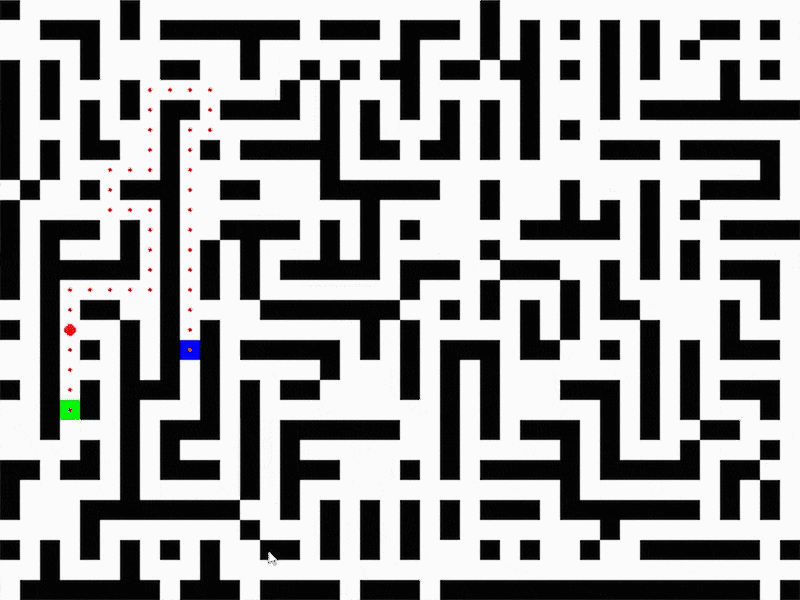